In [1]:
import pandas as pd

# Load the datasets
train_file_path = 'crisismmd_datasplit_all/crisismmd_datasplit_all/task_informative_text_img_train.tsv'
dev_file_path = 'crisismmd_datasplit_all/crisismmd_datasplit_all/task_informative_text_img_dev.tsv'
test_file_path = 'crisismmd_datasplit_all/crisismmd_datasplit_all/task_informative_text_img_test.tsv'

# Load TSV files into DataFrames
train_data = pd.read_csv(train_file_path, sep='\t')
dev_data = pd.read_csv(dev_file_path, sep='\t')
test_data = pd.read_csv(test_file_path, sep='\t')

# Display the first few rows of each dataset
train_data.head(), dev_data.head(), test_data.head()


(             event_name            tweet_id              image_id  \
 0  california_wildfires  917791291823591425  917791291823591425_0   
 1  california_wildfires  917791291823591425  917791291823591425_1   
 2  california_wildfires  917793137925459968  917793137925459968_0   
 3  california_wildfires  917793137925459968  917793137925459968_1   
 4  california_wildfires  917793137925459968  917793137925459968_2   
 
                                           tweet_text  \
 0  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
 1  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
 2  RT @KAKEnews: California wildfires destroy mor...   
 3  RT @KAKEnews: California wildfires destroy mor...   
 4  RT @KAKEnews: California wildfires destroy mor...   
 
                                                image            label  \
 0  data_image/california_wildfires/10_10_2017/917...      informative   
 1  data_image/california_wildfires/10_10_2017/917...  not_informative   
 2  data_ima

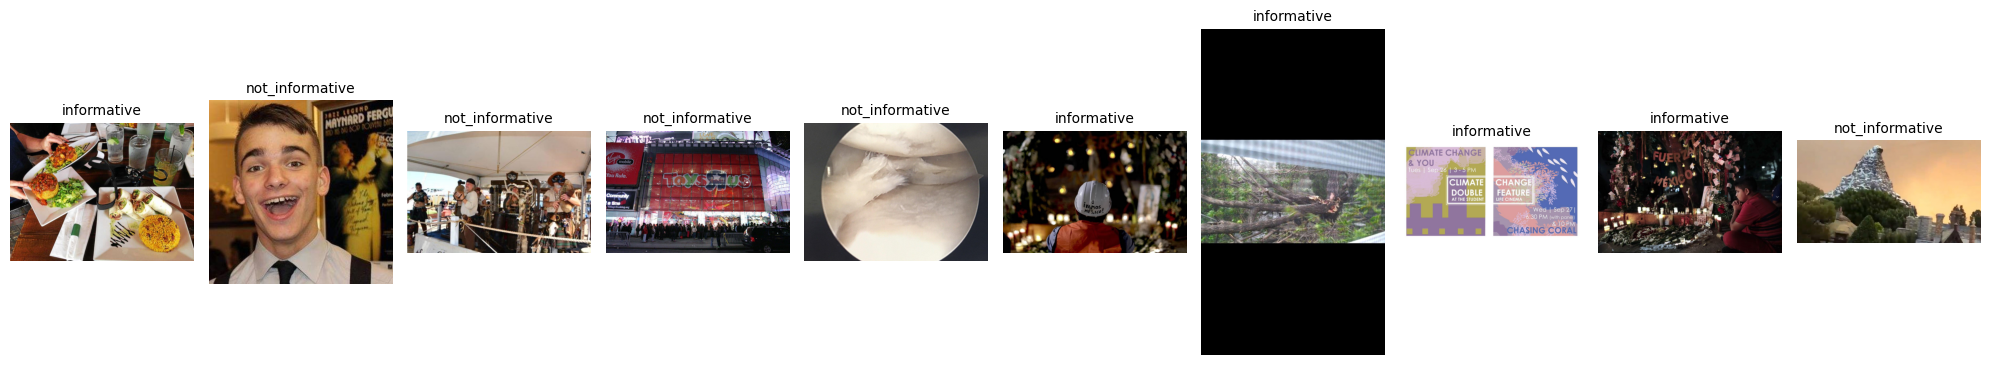

In [2]:
import matplotlib.pyplot as plt
import random
from PIL import Image

# Function to display 10 images with labels
def display_images_with_labels(data, image_column, label_column, num_images=10):
    # Randomly select 10 rows
    sample_data = data.sample(n=num_images)
    
    # Create a figure
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i, (idx, row) in enumerate(sample_data.iterrows()):
        try:
            # Load image
            img_path = row[image_column]
            img = Image.open(img_path)
            
            # Display image
            axes[i].imshow(img)
            axes[i].set_title(row[label_column], fontsize=10)
            axes[i].axis('off')  # Turn off axis labels
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            axes[i].axis('off')
            axes[i].set_title("Error", fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Call the function with train_data
display_images_with_labels(train_data, image_column='image', label_column='label')


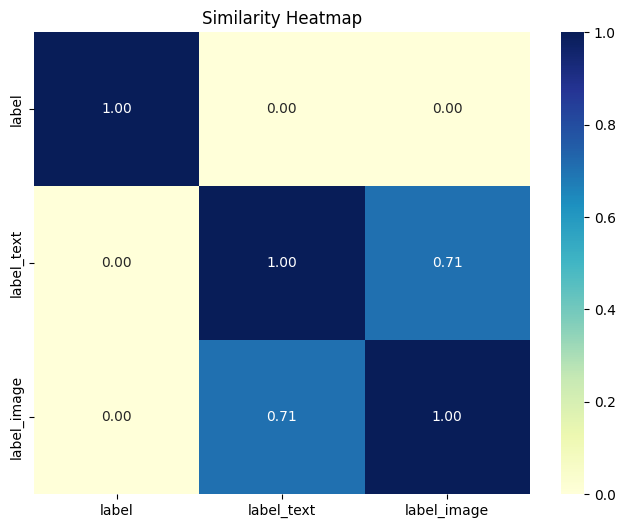

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to calculate similarity scores between columns
def calculate_similarity(df, col1, col2):
    return (df[col1] == df[col2]).mean()

# Function to plot confusion matrices
def plot_confusion_matrix(df, col1, col2, ax):
    cm = confusion_matrix(df[col1], df[col2], labels=df[col1].unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df[col1].unique())
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(f"Confusion Matrix: {col1} vs {col2}")

# Calculate similarity scores
similarities = {
    "label vs label_text": calculate_similarity(train_data, "label", "label_text"),
    "label vs label_image": calculate_similarity(train_data, "label", "label_image"),
    "label_text vs label_image": calculate_similarity(train_data, "label_text", "label_image"),
}

# Create a heatmap of similarities
similarity_df = pd.DataFrame(
    data=[
        [1.0, similarities["label vs label_text"], similarities["label vs label_image"]],
        [similarities["label vs label_text"], 1.0, similarities["label_text vs label_image"]],
        [similarities["label vs label_image"], similarities["label_text vs label_image"], 1.0],
    ],
    index=["label", "label_text", "label_image"],
    columns=["label", "label_text", "label_image"],
)

plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Similarity Heatmap")
plt.show()

# # Plot confusion matrices
# fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# plot_confusion_matrix(train_data, "label", "label_text", axes[0])
# plot_confusion_matrix(train_data, "label", "label_image", axes[1])
# plot_confusion_matrix(train_data, "label_text", "label_image", axes[2])
# plt.tight_layout()
# plt.show()


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\deprecation.py:165: UserWarning: The following named arguments are not valid for `BeitImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)
Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


Epoch 1/5
Training loss: 0.6768, Accuracy: 0.6084


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation loss: 0.6671, Accuracy: 0.6154
                 precision    recall  f1-score   support

not_informative       0.00      0.00      0.00       945
    informative       0.62      1.00      0.76      1512

       accuracy                           0.62      2457
      macro avg       0.31      0.50      0.38      2457
   weighted avg       0.38      0.62      0.47      2457

Epoch 2/5


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Training loss: 0.6701, Accuracy: 0.6122


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation loss: 0.6682, Accuracy: 0.6154
                 precision    recall  f1-score   support

not_informative       0.00      0.00      0.00       945
    informative       0.62      1.00      0.76      1512

       accuracy                           0.62      2457
      macro avg       0.31      0.50      0.38      2457
   weighted avg       0.38      0.62      0.47      2457

Epoch 3/5


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Training loss: 0.6704, Accuracy: 0.6135


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation loss: 0.6665, Accuracy: 0.6154
                 precision    recall  f1-score   support

not_informative       0.00      0.00      0.00       945
    informative       0.62      1.00      0.76      1512

       accuracy                           0.62      2457
      macro avg       0.31      0.50      0.38      2457
   weighted avg       0.38      0.62      0.47      2457

Epoch 4/5


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Training loss: 0.6698, Accuracy: 0.6143


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation loss: 0.6709, Accuracy: 0.6154
                 precision    recall  f1-score   support

not_informative       0.00      0.00      0.00       945
    informative       0.62      1.00      0.76      1512

       accuracy                           0.62      2457
      macro avg       0.31      0.50      0.38      2457
   weighted avg       0.38      0.62      0.47      2457

Epoch 5/5


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Training loss: 0.6693, Accuracy: 0.6143


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation loss: 0.6665, Accuracy: 0.6154
                 precision    recall  f1-score   support

not_informative       0.00      0.00      0.00       945
    informative       0.62      1.00      0.76      1512

       accuracy                           0.62      2457
      macro avg       0.31      0.50      0.38      2457
   weighted avg       0.38      0.62      0.47      2457



c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

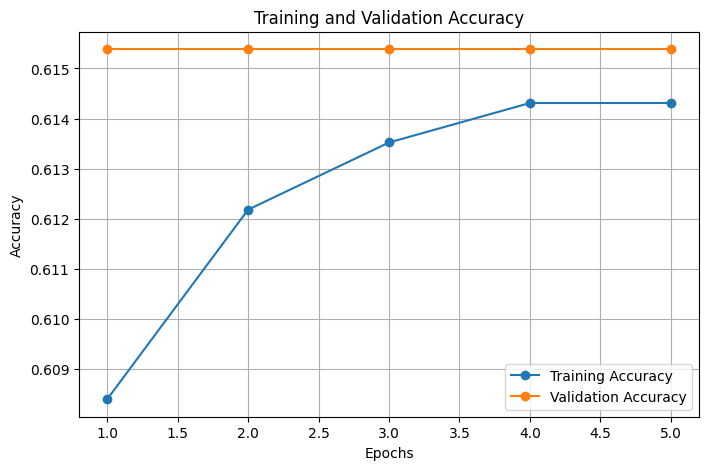

c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


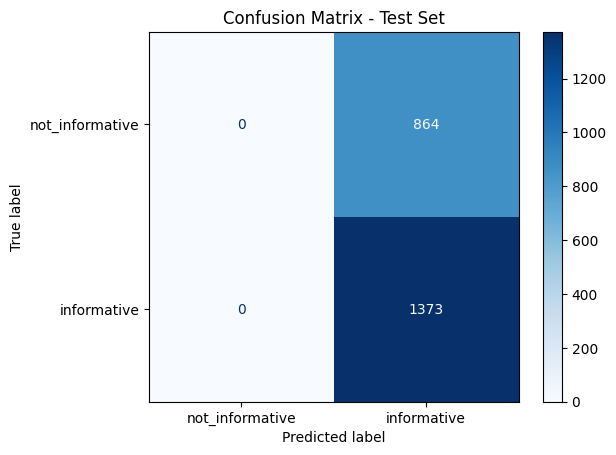

                 precision    recall  f1-score   support

not_informative       0.00      0.00      0.00       864
    informative       0.61      1.00      0.76      1373

       accuracy                           0.61      2237
      macro avg       0.31      0.50      0.38      2237
   weighted avg       0.38      0.61      0.47      2237



c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import BeitForImageClassification, BeitImageProcessor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
train_file_path = 'crisismmd_datasplit_all/crisismmd_datasplit_all/task_informative_text_img_train.tsv'
dev_file_path = 'crisismmd_datasplit_all/crisismmd_datasplit_all/task_informative_text_img_dev.tsv'
test_file_path = 'crisismmd_datasplit_all/crisismmd_datasplit_all/task_informative_text_img_test.tsv'

train_data = pd.read_csv(train_file_path, sep='\t')
dev_data = pd.read_csv(dev_file_path, sep='\t')
test_data = pd.read_csv(test_file_path, sep='\t')

# Combine train and dev datasets for training and validation
data = pd.concat([train_data, dev_data])

# Map labels to binary values
label_mapping = {'informative': 1, 'not_informative': 0}
data['label'] = data['label'].map(label_mapping)
test_data['label'] = test_data['label'].map(label_mapping)

# Define a custom Dataset class
class ImageDataset(Dataset):
    def __init__(self, dataframe, image_processor, transform=None):
        self.dataframe = dataframe
        self.image_processor = image_processor
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = row['image']
        label = row['label']

        # Load and process image
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return self.image_processor(image, return_tensors="pt")["pixel_values"].squeeze(0), label

# Define transforms and image processor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

image_processor = BeitImageProcessor.from_pretrained("microsoft/beit-base-patch16-224")

# Create train-validation split
train_data = data.sample(frac=0.8, random_state=42)
val_data = data.drop(train_data.index)

train_dataset = ImageDataset(train_data, image_processor, transform)
val_dataset = ImageDataset(val_data, image_processor, transform)
test_dataset = ImageDataset(test_data, image_processor, transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load pre-trained BEiT model with mismatched size handling
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BeitForImageClassification.from_pretrained(
    "microsoft/beit-base-patch16-224",
    num_labels=2,  # Number of classes
    ignore_mismatched_sizes=True  # Handle mismatched sizes for classification head
)
model.to(device)

# Training setup
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training and validation loop
def train_and_validate_model(model, train_loader, val_loader, epochs=5):
    train_accuracies, val_accuracies = [], []
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        
        # Training
        model.train()
        train_loss, correct, total = 0.0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(pixel_values=images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_accuracy = correct / total
        train_accuracies.append(train_accuracy)
        print(f"Training loss: {train_loss / len(train_loader):.4f}, Accuracy: {train_accuracy:.4f}")

        # Validation
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        all_preds, all_labels = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(pixel_values=images).logits
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_accuracy = correct / total
        val_accuracies.append(val_accuracy)
        print(f"Validation loss: {val_loss / len(val_loader):.4f}, Accuracy: {val_accuracy:.4f}")
        print(classification_report(all_labels, all_preds, target_names=["not_informative", "informative"]))

    return train_accuracies, val_accuracies

# Train the model
epochs = 5
train_accuracies, val_accuracies = train_and_validate_model(
    model, train_loader, val_loader, epochs=epochs
)

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Evaluate on test set
def evaluate_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(pixel_values=images).logits
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

test_labels, test_preds = evaluate_model(model, test_loader)

# Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not_informative", "informative"])
disp.plot(cmap="Blues", values_format="d")
plt.title('Confusion Matrix - Test Set')
plt.show()

# Classification report
print(classification_report(test_labels, test_preds, target_names=["not_informative", "informative"]))


c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Test Accuracy: 0.6138

Classification Report:
                 precision    recall  f1-score   support

not_informative       0.00      0.00      0.00       864
    informative       0.61      1.00      0.76      1373

       accuracy                           0.61      2237
      macro avg       0.31      0.50      0.38      2237
   weighted avg       0.38      0.61      0.47      2237



c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

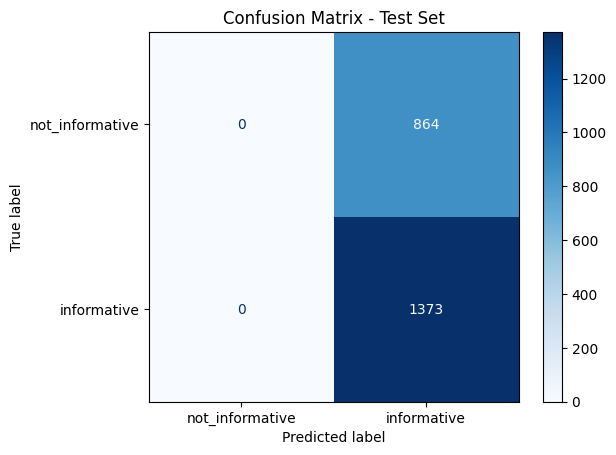

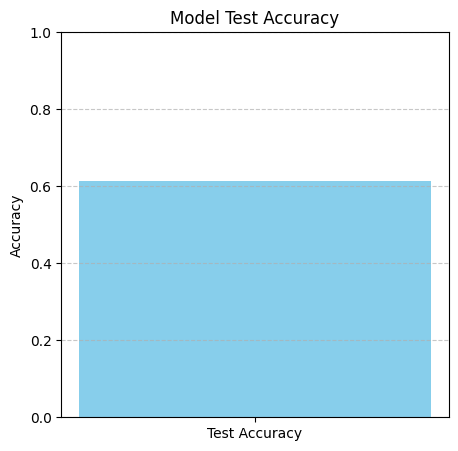

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Function to evaluate the model on the test set
def evaluate_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(pixel_values=images).logits
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

# Evaluate the model
test_labels, test_preds = evaluate_model(model, test_loader)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(test_labels, test_preds, target_names=["not_informative", "informative"]))

# Plot confusion matrix
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not_informative", "informative"])
disp.plot(cmap="Blues", values_format="d")
plt.title('Confusion Matrix - Test Set')
plt.show()

# Visualize accuracy in a bar chart
labels = ['Test Accuracy']
accuracies = [test_accuracy]

plt.figure(figsize=(5, 5))
plt.bar(labels, accuracies, color='skyblue')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel('Accuracy')
plt.title('Model Test Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
